# Home Loan Approval Project

## Objective :
* The aim of this project is to determine, given a set of parameters, whether a canditate is suitable to recieve a home loan on a given property.
* For this project, the dataset is provided by Kaggle. The link for the same is : https://www.kaggle.com/datasets/sazid28/home-loan.
* Thus, for this project, we consider the 'Target' to be predicted as the 'Loan Status' feature, that indicates whether a given canditate is dispensed the loan.
* The flow of the project is as follows : 
    * Perform exploratory data analysis on the data. This includes : 
        * Inspection of the data
        * Performing univariate and bivariate analysis
        * Visualizing the relationships between features
    * Data cleaning and preparation
        * Cleaning the data of any anomalies
        * Preparing the data for further steps
    * Using Feature Engineering to :
        * Analyse and choose informative features
        * Creating new features that might have stronger relationship
        * Preparing the data for the ML model
    * Using Machine Learning to : 
        * Determine the most optimal model for the task
        * Use the said model to predict the outcome.

References : https://www.kaggle.com/code/sazid28/home-loan-prediction/notebook

### The dataset for the given problem is divided into two parts :
* Train
* Test

We will be using the 'Train' data to train the model and 'Test' data to predict the outcome status of the Loan approval

In [10]:
#We first import the necessary libraries for the tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Reading the csv file and copying the data o that the original files remain unaltered
train = pd.read_csv('home-loan/train.csv').copy()
test = pd.read_csv('home-loan/test.csv').copy()

In [7]:
#We first inspect the data
df = pd.DataFrame(train)
print("The structure of the data frame : ", df.shape)
df.head()

The structure of the data frame :  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Thus we can conclude that our data has 13 columns and has 614 entries(rows)

In [5]:
#We can also get the statistical information regarding the dataframe and informatino about its columns
print("\nStatistical features of the data ",df.describe())
#We can also have information on its columns
print("\n")
print(df.info())


Statistical features of the data         ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613

## Univariate Analysis : Categorical variables

As a part of univariate analysis, we analyse each column individually and its statistical properties

### Univariate analysis of feature : 'Gender' 

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object
The percentage of men versus females applying for a home loan are : 
 Male      81.364393
Female    18.635607
Name: Gender, dtype: float64


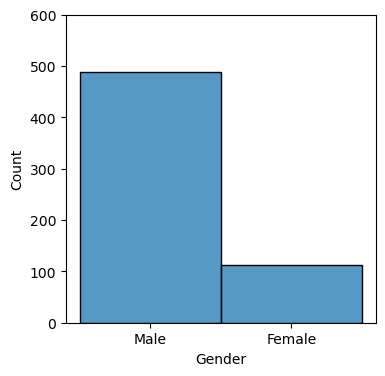

In [28]:
#Analysing gender
plt.figure(figsize=(4,4))
sns.histplot(data=df['Gender'])
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Gender.describe())
print("The percentage of men versus females applying for a home loan are : \n", df['Gender'].value_counts(normalize=True)*100)
plt.show()

### Univariate analysis of feature : 'Marriage Status' 

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

The percentage of married versus unmarried people applying for a home loan are :
 Yes    65.139116
No     34.860884
Name: Married, dtype: float64


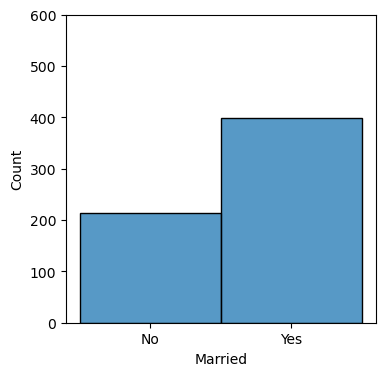

In [29]:
#Analysing Marriage status 
plt.figure(figsize=(4,4))
sns.histplot(data = df, x = 'Married')
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Married.describe())
print('\nThe percentage of married versus unmarried people applying for a home loan are :\n', df.Married.value_counts(normalize = True)*100)
plt.show()

### Univariate analysis of feature : 'Dependents' 

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

The percentage of married versus unmarried people applying for a home loan are :
 0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64


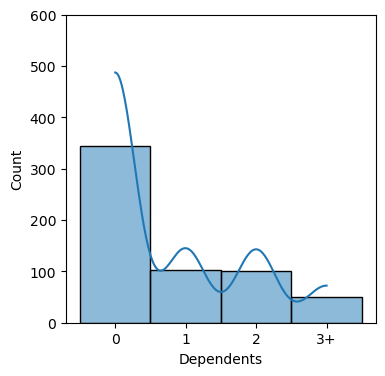

In [30]:
#Analysing the 'Dependent' column
plt.figure(figsize=(4,4))
sns.histplot(data = df, x = 'Dependents', kde=True)
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Dependents.describe())
print('\nThe percentage of married versus unmarried people applying for a home loan are :\n', df.Dependents.value_counts(normalize = True)*100)
plt.show()

### Univariate analysis of feature : 'Educational Qualification' 

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


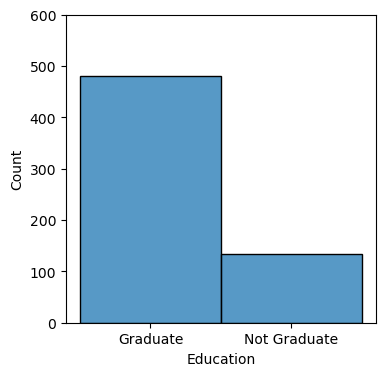

In [31]:
#Analysing Educational qualification
plt.figure(figsize=(4,4))
sns.histplot(data = df, x = 'Education')
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Education.describe())
print(df.Education.value_counts())
plt.show()

### Univariate Analysis of Feature : Employ category

count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object
No     500
Yes     82
Name: Self_Employed, dtype: int64


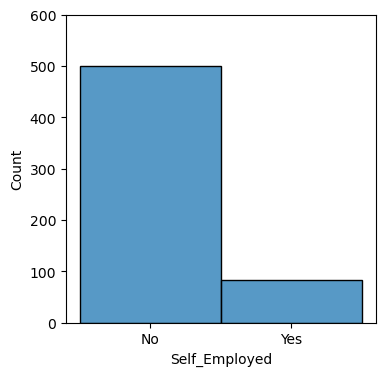

In [32]:
#Analysing the 'Self-Employed' feature
plt.figure(figsize=(4,4))
sns.histplot(data = df['Self_Employed'])
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Self_Employed.describe())
print(df.Self_Employed.value_counts())
plt.show()

### Univariate analysis of feature : 'Property Area' 

count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


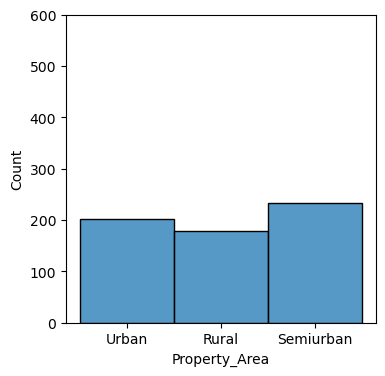

In [33]:
#Analysing property area type
plt.figure(figsize=(4,4))
sns.histplot(data = df['Property_Area'])
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Property_Area.describe())
print(df.Property_Area.value_counts())
plt.show()

### Univariate analysis of feature : Credit History

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64
1.0    475
0.0     89
Name: Credit_History, dtype: int64


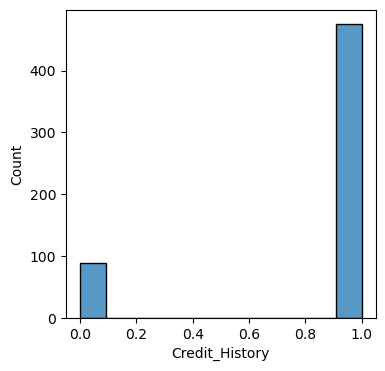

In [34]:
#Analysis of feature 'Credit History'
plt.figure(figsize=(4,4))
sns.histplot(data = df['Credit_History'], kde=False)
print(df.Credit_History.describe())
print(df.Credit_History.value_counts())
#I have a suspicion of some outliers
plt.show()

## Insights : 
* It indicates that far more number of males apply for a home loan that females
* Married people are almost twice as more likely to apply for a home loan than unmarried folks.
* The above analysis shows that people with surplus cash are able to invest it in real estate. Here we can formulate a hypothesis that people with more income tend to have the fiscal ability to buy homes. We will resolve this hypothesis in the coming cells.
* This confirms that a lot more number of graduates are applying for loans. This might be because graduates are more likely to secure a regular income source.
* This confirms our insight from the education feature analysis that people with steady, regular income tend to be able to invest in real estate
* The above analysis shows that property area : Rural, Urban or Semi-Urban have no effect on Loan approval
* People with good credit histroy are more likely to recieve a home loan. This goes to show fiscal literacy and maybe surplus money. This can validate the theory of surplus money allowing investment in real estate and thereby home loan approval.
* No spelling errors

## Univariate Analysis : Continous features
As a part of univariate analysis, we analyse each column individually with its statistical properties

### Univariate analysis of feature : Applicant Income

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


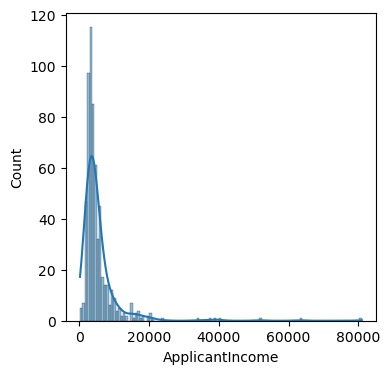

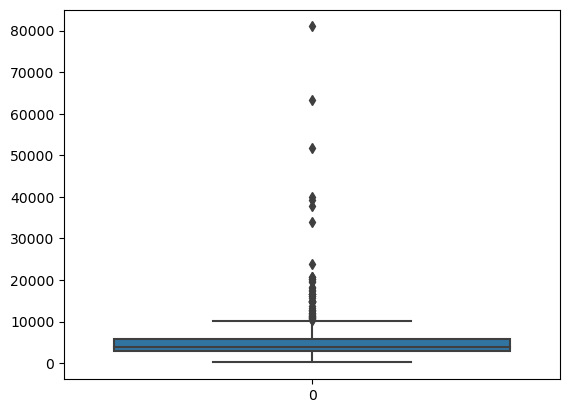

In [35]:
#Analysis of feature 'Applicant Income'
plt.figure(figsize=(4,4))
sns.histplot(data = df['ApplicantIncome'], kde=True)
print(df.ApplicantIncome.describe())
plt.show()
#I have a suspicion of some outliers
sns.boxplot(data=df['ApplicantIncome'])
plt.show()


### Univariate analysis of feature : CoApplicant Income

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


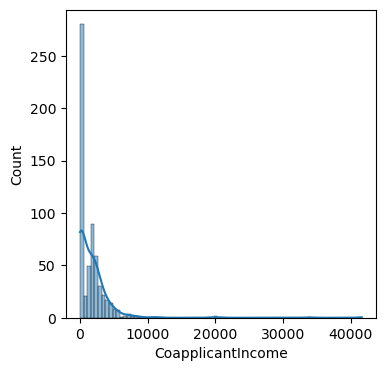

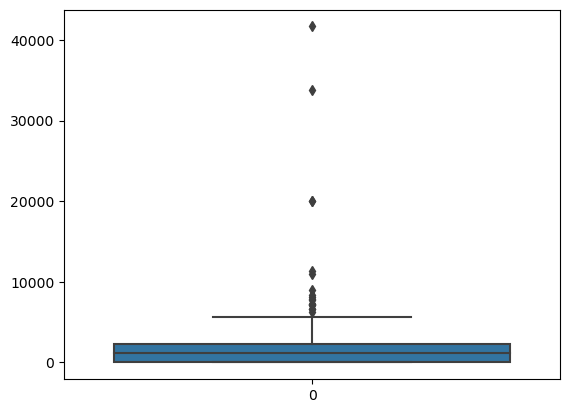

In [36]:
#Analysis of feature 'Applicant Income'
plt.figure(figsize=(4,4))
sns.histplot(data = df['CoapplicantIncome'], kde=True)
print(df.CoapplicantIncome.describe())
plt.show()
#I have a suspicion of some outliers
sns.boxplot(data=df['CoapplicantIncome'])
plt.show()

No significant insights gained

### Univariate analysis of feature : Loan Amount

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


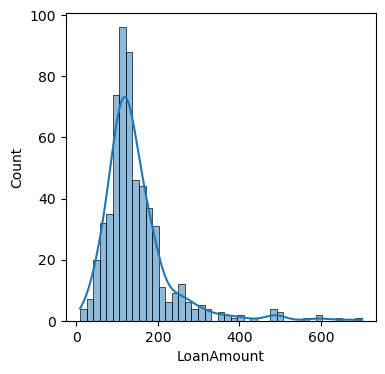

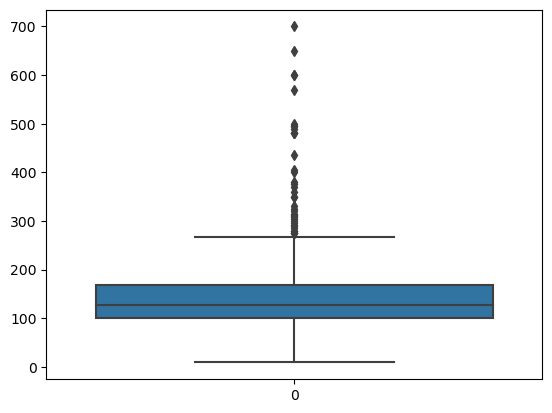

In [37]:
#Analysis of Loan Amount
plt.figure(figsize=(4,4))
sns.histplot(data = df['LoanAmount'], kde=True)
print(df.LoanAmount.describe())
plt.show()
#I have a suspicion of some outliers
sns.boxplot(data=df['LoanAmount'])
plt.show()

### Univariate analysis of feature : Loan Term

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


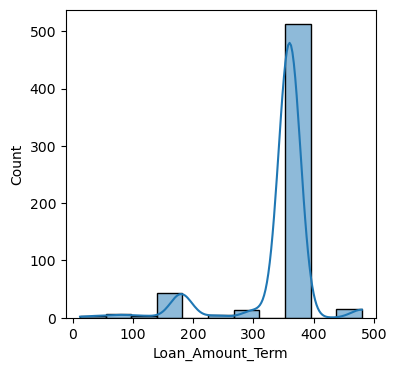

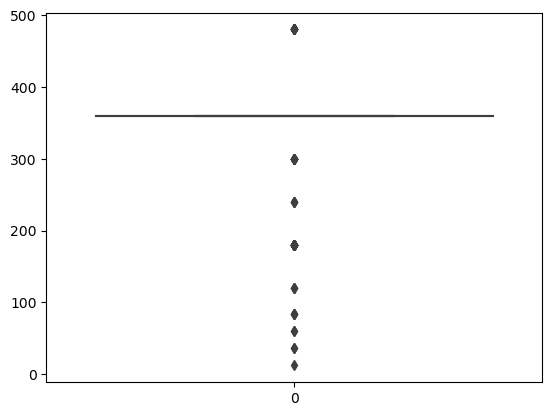

In [38]:
#Analysis of feature 'Loan Term'
plt.figure(figsize=(4,4))
sns.histplot(data = df['Loan_Amount_Term'], kde=True)
print(df.Loan_Amount_Term.describe())
plt.show()
#I have a suspicion of some outliers
sns.boxplot(data=df['Loan_Amount_Term'])
plt.show()

### All the visualizations at a glance

<Figure size 400x400 with 0 Axes>

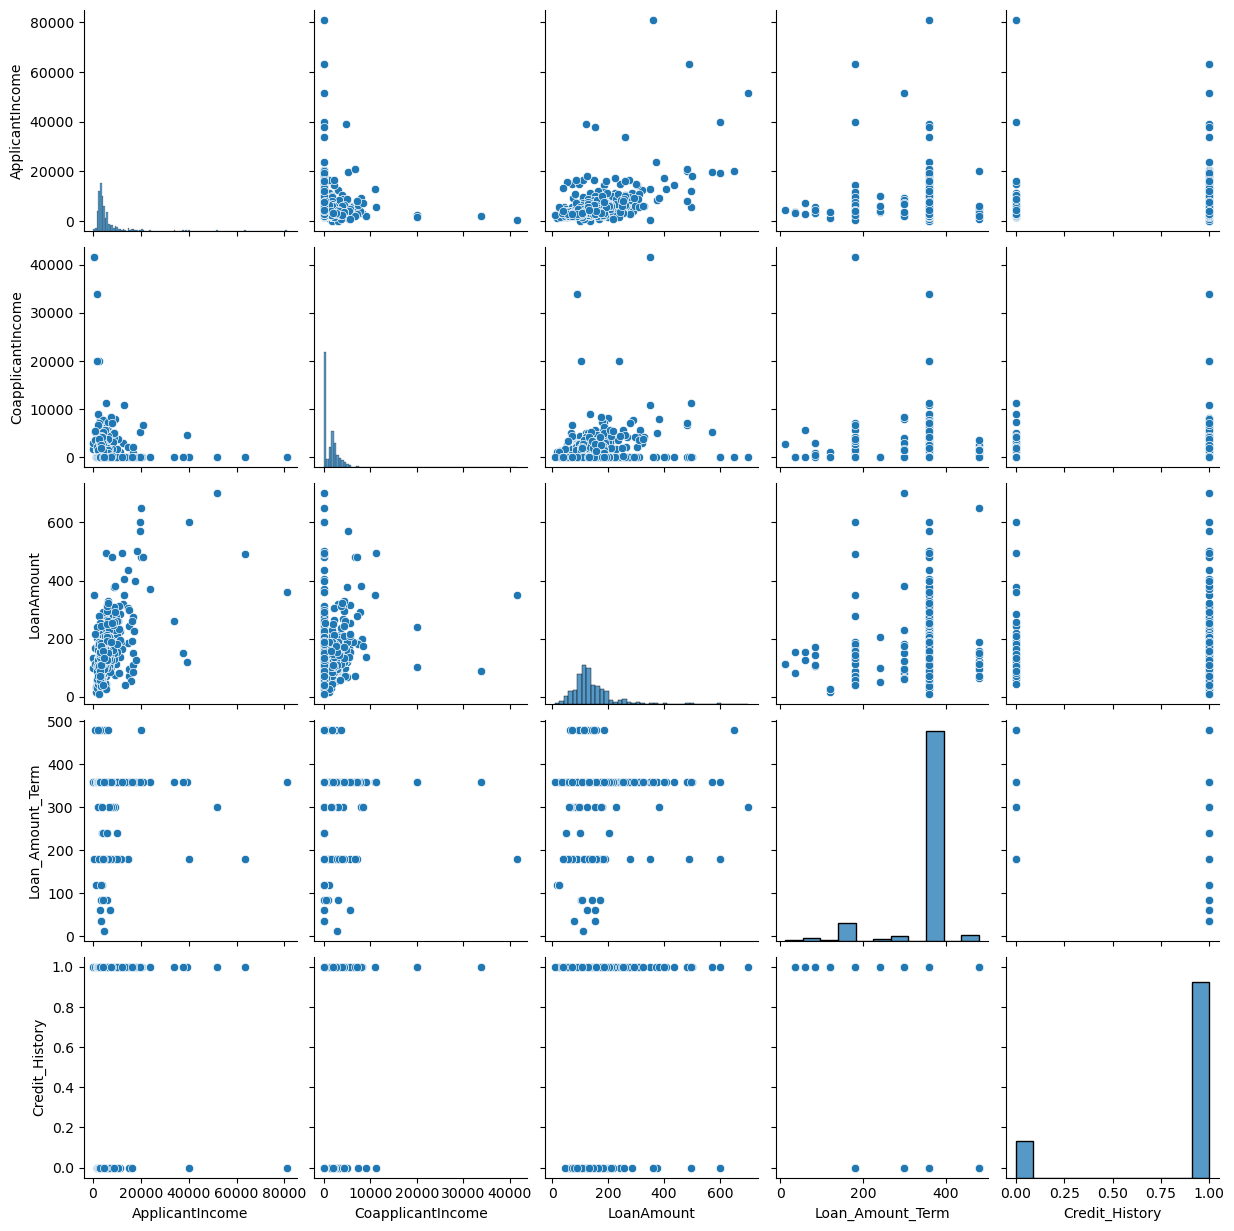

In [6]:
plt.figure(figsize=(4,4))
sns.pairplot(df)
plt.show()

## Insights : 
* The applicant income and loan amount is right-skewed, we need to normalize it so that the ML model works well
* We need to deal with outliers, which will be done in the data processing step
* The most common loan duration is of 360 days -> 1 year

## Bivariate Analysis : 
As a part of Bivariate Analysis, we analyse the relationship between two features/variables

### Mutual Information table and Correlation Heatmap

C:\Users\Acer\AppData\Local\Temp\ipykernel_5628\2225912047.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


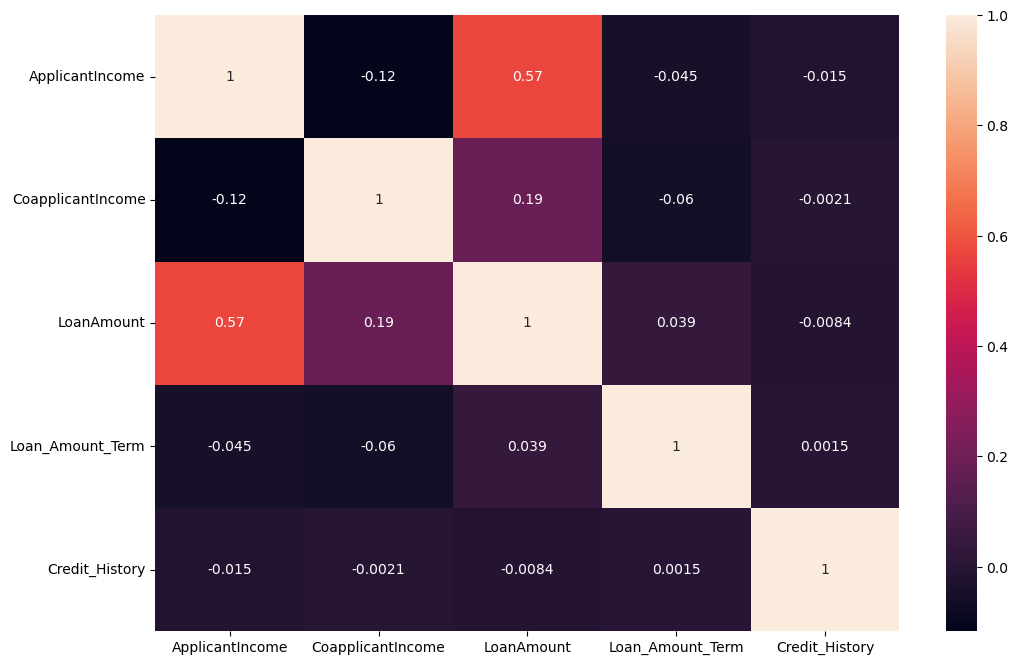

In [39]:
#We will find the values for Mutual Information later
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

The above heatmap shows some very interesting relations. We will analyse these relations further.

### Bivariate Analysis of : Loan Amout Term and Credit History

<Figure size 400x400 with 0 Axes>

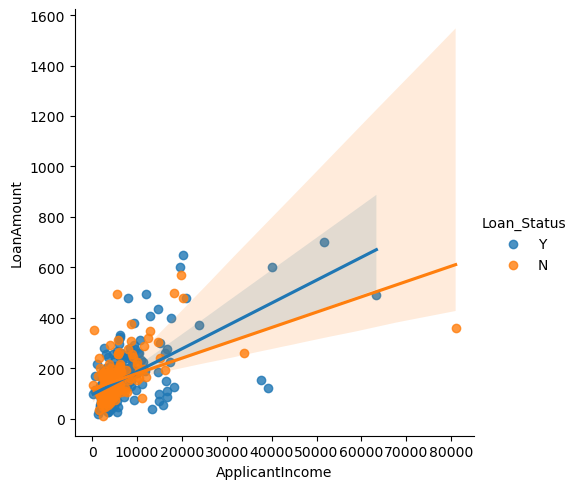

In [40]:
#Bivariate analysis of loan amount and applicant income
plt.figure(figsize=(4,4))
sns.lmplot(data=df, x='ApplicantIncome', y='LoanAmount', hue = 'Loan_Status')
plt.show()

### Bivariate Analysis : Co-Applicant Income and Loan Amount

<Figure size 400x400 with 0 Axes>

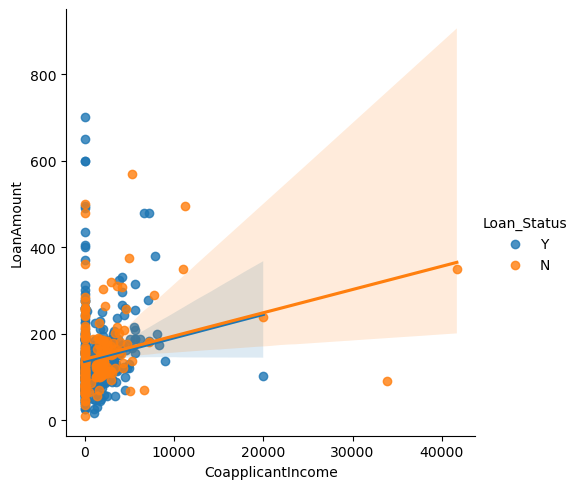

The description of Applicant Income feature : 
 count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64
The description of Co-Applicant Income feature : 
 count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


In [41]:
#Bivariate analysis of loan amount and applicant income
plt.figure(figsize=(4,4))
sns.lmplot(data=df, x='CoapplicantIncome', y='LoanAmount', hue = 'Loan_Status')
plt.show()
print("The description of Applicant Income feature : \n",df['ApplicantIncome'].describe())
print("The description of Co-Applicant Income feature : \n", df['CoapplicantIncome'].describe())

### Bivariate Analysis : Loan Amount and Loan Amount Term

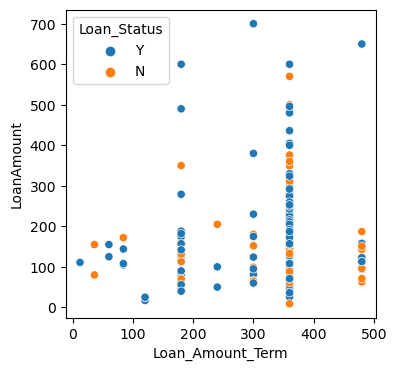

The description of Loan Amount feature : 
 count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64
The description of Loan Amount Term feature : 
 count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


In [42]:
#Bivariate analysis of Loan Amount and Loan Amount Term
plt.figure(figsize=(4,4))
sns.scatterplot(data=df, x='Loan_Amount_Term', y='LoanAmount', hue = 'Loan_Status')
plt.show()
print("The description of Loan Amount feature : \n",df['LoanAmount'].describe())
print("The description of Loan Amount Term feature : \n", df['Loan_Amount_Term'].describe())

### Bivariate Analysis : Loan Amount Term and Credit History

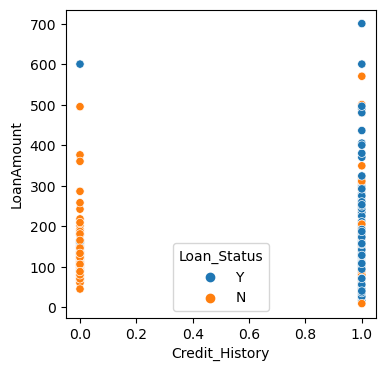

The description of Credit History feature : 
 count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64
The description of Loan Amount Term feature : 
 count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


In [43]:
#Bivariate analysis of Credit History and Loan Amount Term
plt.figure(figsize=(4,4))
sns.scatterplot(data=df, x='Credit_History', y='LoanAmount', hue = 'Loan_Status')
plt.show()
print("The description of Credit History feature : \n",df['Credit_History'].describe())
print("The description of Loan Amount Term feature : \n", df['LoanAmount'].describe())

### Bivariate Analysis : Gender and Married

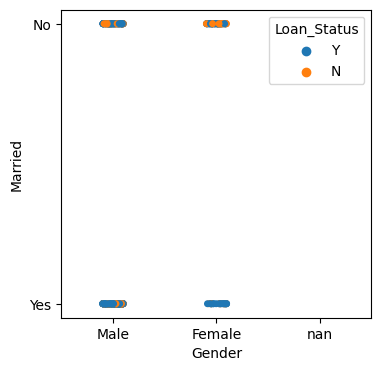

Married         No        Yes
Gender                       
Female   72.072072  27.927928
Male     26.694045  73.305955


In [44]:
#Analysing gender and married status together
plt.figure(figsize=(4,4))
sns.stripplot(data = df, x = 'Gender', y = 'Married', hue = 'Loan_Status')
plt.show()
#To confirm the insights
freq_table = pd.crosstab(df['Gender'], df['Married'], normalize='index')*100
print(freq_table)

### Bivariate Analysis : Gender and Dependents

Dependents          0          1          2        3+
Gender                                               
Female      73.394495  17.431193   6.422018  2.752294
Male        54.088050  17.190776  19.287212  9.433962


d:\Anaconda\anafiles\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 74.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\anafiles\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\anafiles\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 90.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\anafiles\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


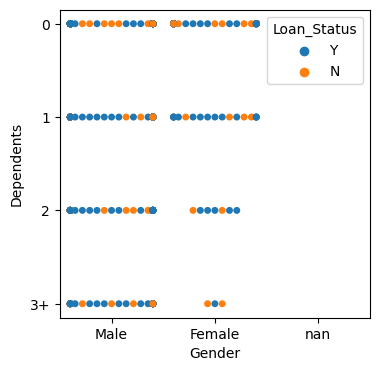

In [45]:
#Analyse Gender and Dependents
plt.figure(figsize=(4,4))
print(pd.crosstab(df['Gender'],df['Dependents'], normalize='index')*100)
sns.swarmplot(data=df, x = 'Gender', y = 'Dependents', hue = 'Loan_Status')
plt.show()

### Bivariate analysis : Education and Self-Employed

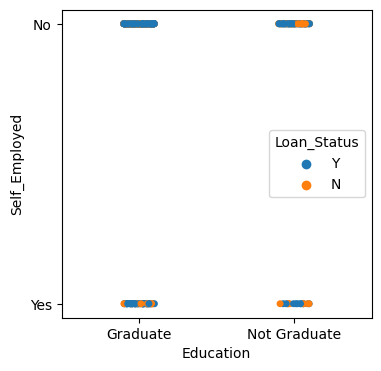

Self_Employed         No        Yes
Education                          
Graduate       85.682819  14.317181
Not Graduate   86.718750  13.281250


In [46]:
#Analysing 'Education' and 'Self-Employed' features
plt.figure(figsize=(4,4))
sns.stripplot(data=df, x = 'Education', y = 'Self_Employed', hue = 'Loan_Status')
plt.show()

print(pd.crosstab(df['Education'], df['Self_Employed'], normalize='index')*100)

### Bivariate Analysis : Marriage Status , Loan Amount

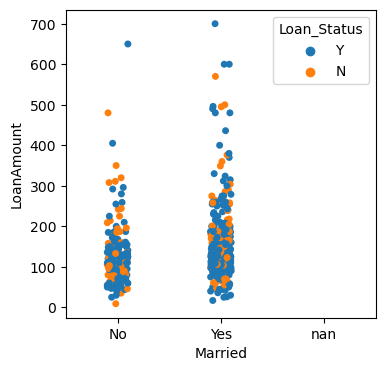

In [47]:
#Analysing 'Married' and 'Loan Amount' features
plt.figure(figsize=(4,4))
sns.stripplot(data=df, x = 'Married', y = 'LoanAmount', hue = 'Loan_Status')
plt.show()

## Insights : 
* Loan Amount tends to be more for a applicants with greater income
* No significant influence of income of co-applicant on loan status
* No discernable relation between loan amount and loan term
* People with good credit history tend to apply for larger loans
* Married males tend to usually apply for home loans.
    * Females, in general, tend to apply less for hoam loans.
    * Even less are awareded home loans
* Females are less likely to have 2,3 or more dependents. Those of them who do apply for loans have very slim chances of having their home loans approved.
* Contrary to common thinking, marital status and loan amount have no discernable relation.

## Data Cleaning : 
In the data cleaning and preprocessing steps, we clean the data and make it suitable for further processing.
With this objective, we'll be doing the following : 
* Dealing with missing values using imputers
* Dealing with categorical variables
* Remove the outliers
* Scaling the data
* Normalizing the data
* Since there are no spelling errors, we can skip the step.

In [13]:
#First, we inspect the data again
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
#We will now drop the 'Loan_ID' column as it is does not provide any insight into the loan status
df.drop('Loan_ID', axis=1, inplace=True)
#Also, since the 'Loan_Status' is our target variable, we will store it in a separate variable
y = df['Loan_Status']
X = df.drop('Loan_Status', axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [15]:
#Now, we first check for missing values in the dataset
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [49]:
#To deal with missing values, we first have to spearate the numerical versus the categorical data
#This is because we need to apply different imputer strategies for numerical and categorical data 
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns.tolist()

df[cat_cols].head()
# df[num_cols].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [60]:
#We first import the imputers
from sklearn.impute import SimpleImputer

#Creating imputer objects
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='mean')

#Selecting the cols for the respective imputers

df_cat = df[cat_cols]
df_num = df[num_cols]

df_cat = pd.DataFrame(cat_imputer.fit_transform(df_cat))
df_num = pd.DataFrame(num_imputer.fit_transform(df_num))

#Cross-checking to make sure that the values are imputed
# print(df_cat.isnull().sum())
# print(df_num.isnull().sum())
# print(df_cat.head(10))
# print(df_num.head(10))

#Joining the two dataframes
new_df = pd.concat([df_cat, df_num], axis=1)
#Renaming the features
new_df.columns = ['Gender', 'Married',	'Dependents','Education','Self_Employed','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,Graduate,No,Urban,5849.0,0.0,146.412162,360.0,1.0
1,Male,Yes,1,Graduate,No,Rural,4583.0,1508.0,128.000000,360.0,1.0
2,Male,Yes,0,Graduate,Yes,Urban,3000.0,0.0,66.000000,360.0,1.0
3,Male,Yes,0,Not Graduate,No,Urban,2583.0,2358.0,120.000000,360.0,1.0
4,Male,No,0,Graduate,No,Urban,6000.0,0.0,141.000000,360.0,1.0


<Figure size 1800x1200 with 0 Axes>

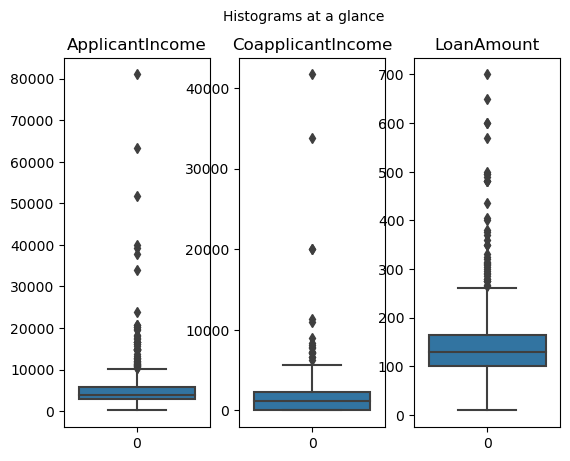

In [80]:
#We will now deal with outliers in the group
#To figure out the outliers, we will make a boxplot
plt.figure(figsize=(18,12))

figure, ax = plt.subplots(nrows=1, ncols=3)
figure.suptitle('Histograms at a glance', fontsize=10)

# Fixing the while loop condition
counter=0
for i in range(0,3,1):
    sns.boxplot(df_num[df_num.columns[counter]], ax=ax[i])
    ax[i].set_title(df_num.columns[counter])
    counter+=1
plt.show()

#### Encoding the categorical variables to prepare them for ML model

In [18]:
#Now that the missing values are dealt with, we will now deal with categorical variables
#For that purpose, we use the One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
df_cat_ohe = pd.DataFrame(ohe.fit_transform(df_cat), index=df_cat.index)
df_cat_ohe.head()

d:\Anaconda\anafiles\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


#### Finding Mutual information
Since we were unable to find out the mutual information in the previous cells because of the raw nature of data, we will be doing so in the following cell